### Objective

This notebook aims to identify and handle outliers in the datasets for Bitcoin (BTC) and the S&P 500 (SP500). Key steps include:

1. Using the Interquartile Range (IQR) method to detect outliers in the "Close" column for both datasets.
2. Visualizing the distributions of the "Close" prices with boxplots to confirm the presence of outliers.

This process ensures that the datasets are clean, consistent, and free from extreme values that might bias the results of the comparative study.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
btc_data = pd.read_csv('./Data/raw_data_but_cleaned/BTC_combined_2014_2024.csv')
sp500_data = pd.read_csv('./Data/raw_data_but_cleaned/sp500_data_filtered.csv')

# Convert the Date column into datetime64 type for both tables
btc_data['Date'] = pd.to_datetime(btc_data['Date'])
sp500_data['Date'] = pd.to_datetime(sp500_data['Date'])

In [5]:
# Rage date for BTC 
print("BTC date range:", btc_data['Date'].min(), "to", btc_data['Date'].max())

# Rage date for S&P 500
print("S&P 500 Date Rage:", sp500_data['Date'].min(), "to", sp500_data['Date'].max())

BTC date range: 2014-09-18 00:00:00 to 2024-05-01 00:00:00
S&P 500 Date Rage: 2014-09-18 00:00:00 to 2024-05-01 00:00:00


Checking missing dates in both datasets

In [6]:
# Getting dates from BTC and S&P 500 datasets
btc_dates = pd.to_datetime(btc_data['Date'])
sp500_dates = pd.to_datetime(sp500_data['Date'])

Filter the BTC dataset in order to match with the S&P 500 dataset dates

In [7]:
common_dates = sp500_data['Date'] 
btc_data = btc_data[btc_data['Date'].isin(common_dates)] # filter btc_data with the common dates with sp500_dates

In [8]:
btc_data.reset_index(drop=True, inplace=True)
sp500_data.reset_index(drop=True, inplace=True)

In [9]:
btc_data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,3.448320e+07
1,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,3.791970e+07
2,2014-09-22,399.100006,406.915985,397.130005,402.152008,402.152008,2.412760e+07
3,2014-09-23,402.092010,441.557007,396.196991,435.790985,435.790985,4.509950e+07
4,2014-09-24,435.751007,436.112000,421.131989,423.204987,423.204987,3.062770e+07
...,...,...,...,...,...,...,...
2415,2024-04-24,66408.718750,67075.367188,63589.871094,64276.898438,64276.898438,3.027666e+10
2416,2024-04-25,64275.019531,65275.207031,62783.632813,64481.707031,64481.707031,3.215579e+10
2417,2024-04-26,64485.371094,64789.656250,63322.398438,63755.320313,63755.320313,2.413937e+10
2418,2024-04-29,63106.363281,64174.878906,61795.457031,63841.121094,63841.121094,2.663591e+10


In [10]:
sp500_data

,Date,Open,High,Low,Close,Volume
0,2014-09-18,2003.069946,2012.339966,2003.069946,2011.359985,3235340000
1,2014-09-19,2012.739990,2019.260010,2006.589966,2010.400024,4880220000
2,2014-09-22,2009.079956,2009.079956,1991.010010,1994.290039,3349670000
3,2014-09-23,1992.780029,1995.410034,1982.770020,1982.770020,3279350000
4,2014-09-24,1983.339966,1999.790039,1978.630005,1998.300049,3313850000
...,...,...,...,...,...,...
2416,2024-04-25,5019.879883,5057.750000,4990.580078,5048.419922,3958050000
2417,2024-04-26,5084.649902,5114.620117,5073.140137,5099.959961,3604140000
2418,2024-04-29,5114.129883,5123.490234,5088.649902,5116.169922,3447450000
2419,2024-04-30,5103.779785,5110.830078,5035.310059,5035.689941,4082470000


1 date is missing in order to match both datasets, fixing that now

In [11]:
# Find the dates that sp500_data has but btc_data dont'
missing_in_btc = sp500_data[~sp500_data['Date'].isin(btc_data['Date'])]

# Find the dates that btc_data has but sp500_data don't
missing_in_sp500 = btc_data[~btc_data['Date'].isin(sp500_data['Date'])]

print(f"missing in btc_data:\n {missing_in_btc} \n")
print(f"missing in sp500_data:\n {missing_in_sp500} \n")

missing in btc_data:
            Date         Open         High          Low        Close  \
2419 2024-04-30  5103.779785  5110.830078  5035.310059  5035.689941   

          Volume  
2419  4082470000   

missing in sp500_data:
 Empty DataFrame
Columns: [Date, Open, High, Low, Close, Adj Close, Volume]
Index: [] 



Removing the missing date, removed from sp500_data in order to make both datasets match

In [12]:
sp500_data = sp500_data[sp500_data['Date'] != '2024-04-30']

# reset index in both datasets
btc_data.reset_index(drop=True, inplace=True)
sp500_data.reset_index(drop=True, inplace=True)

# Find the dates that sp500_data has but btc_data dont'
missing_in_btc = sp500_data[~sp500_data['Date'].isin(btc_data['Date'])]

print(f"missing in btc_data:\n {missing_in_btc} \n")

missing in btc_data:
 Empty DataFrame
Columns: [Date, Open, High, Low, Close, Volume]
Index: [] 



Making sure no duplicated or null values are in the datasets

In [13]:
print(btc_data.isnull().sum(),'\n')
print(sp500_data.isnull().sum(),'\n')
print(btc_data.duplicated().sum(),'\n')
print(sp500_data.duplicated().sum(),'\n')

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64 

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64 

0 

0 



Descriptive Analisis

In [14]:
print(btc_data.describe(),'\n')
print(sp500_data.describe())

                                Date          Open          High  \
count                           2420   2420.000000   2420.000000   
mean   2019-07-09 02:14:28.760330752  16025.704048  16435.798946   
min              2014-09-18 00:00:00    176.897003    215.240997   
25%              2017-02-12 06:00:00   1026.510010   1046.707550   
50%              2019-07-10 12:00:00   8705.449219   8875.632812   
75%              2021-12-01 06:00:00  26887.815918  27335.662598   
max              2024-05-01 00:00:00  73079.375000  73750.070313   
std                              NaN  17803.837508  18272.309272   

                Low         Close     Adj Close        Volume  
count   2420.000000   2420.000000   2420.000000  2.420000e+03  
mean   15581.727054  16039.567219  16039.567219  1.839613e+10  
min      171.509995    178.102997    178.102997  7.845880e+06  
25%     1008.504989   1029.292511   1029.292511  2.364240e+08  
50%     8424.935058   8712.442383   8712.442383  1.443086e+10  
75%

Looking for Outliers in IQR

In [15]:
# Function for dectect outlier values using IQR
def detect_outliers_iqr(data, column):
  Q1 = data[column].quantile(0.25) # First quarter
  Q3 = data[column].quantile(0.75) # Third quarter
  IQR = Q3 - Q1 # Interquarter Range
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  
  # Filter outlier values
  outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
  print(f"Outlier values found in {column}: {len(outliers)}")
  return outliers, lower_bound, upper_bound

In [ ]:
# Detect the outliers in close prices (Close)
btc_outliers, btc_lower, btc_upper = detect_outliers_iqr(btc_data, 'Close')
sp500_outliers, sp500_lower, sp500_upper = detect_outliers_iqr(sp500_data, 'Close')

Outlier values found in Close: 29
Outlier values found in Close: 0


Visualize the outliers with Boxplot graphs

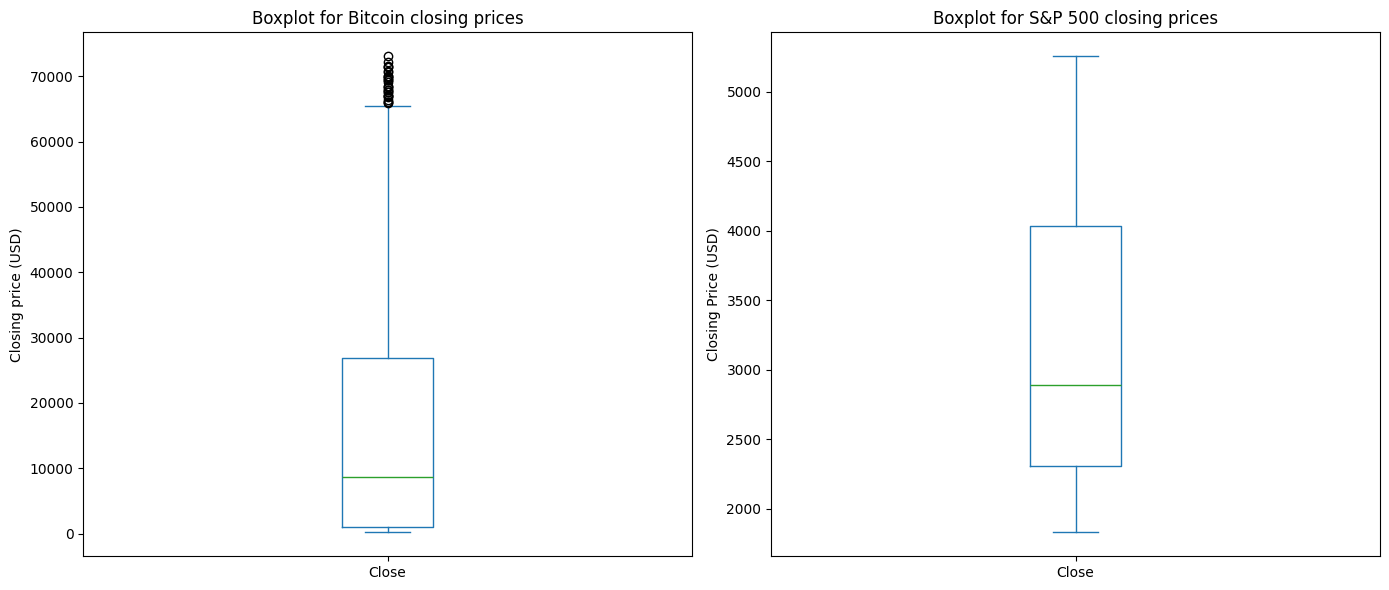

In [18]:
# BTC visualization
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
btc_data['Close'].plot(kind='box')
plt.title("Boxplot for Bitcoin closing prices")
plt.ylabel("Closing price (USD)")

# S&P 500 visualization
plt.subplot(1, 2, 2)
sp500_data['Close'].plot(kind='box')
plt.title("Boxplot for S&P 500 closing prices")
plt.ylabel("Closing Price (USD)")

plt.tight_layout()
plt.show()

Exporting the new datasets cleaned and aligned to new CSV files

In [17]:
btc_data.to_csv('./Data/btc_data_aligned_with_sp500.csv', index=False)
sp500_data.to_csv('./Data/sp500_data_aligned_with_btc_data.csv', index=False)

### Observations

- Outliers were detected in the "Close" prices of both Bitcoin and the S&P 500 datasets using the Interquartile Range (IQR) method.
- Visual inspection with boxplots revealed the presence of extreme values beyond the whiskers, confirming the statistical findings.
- Removing outliers is optional and depends on the goal of the analysis:
  - Retaining outliers could highlight interesting market behaviors during extreme events (e.g., crashes or spikes).
  - Removing outliers ensures that the analysis focuses on typical market behavior, reducing the potential for skewed results.
- The datasets are now ready for further analysis, whether including or excluding outliers.
